# 📊 Data Analytics Challenge - Decentraland Foundation

<p align="center">
  <img src="https://cryptologos.cc/logos/decentraland-mana-logo.svg?v=040" alt="Decentraland Logo" width="150">
</p>

## Library Loading

Load all necessary libraries for the analysis.

In [7]:
import pandas as pd
import requests
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

## Dataset Loading

Load the datasets that will be used throughout the analysis.

In [4]:
#Main urls
url_users_2024 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/usuarios_ecobici_2024.csv"
url_bike_stations = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/estaciones-bicicletas-publicas/nuevas-estaciones-bicicletas-publicas.csv"
url_mecanical_points = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/estaciones-bicicletas-publicas/mecanica-sencilla.csv"
zip_url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/recorridos-realizados-2024.zip"

In [8]:
#Main dfs
df_users_2024 = pd.read_csv(url_users_2024, encoding="utf-8")
df_bike_stations = pd.read_csv(url_bike_stations, encoding="utf-8")
df_mecanical_points = pd.read_csv(
    url_mecanical_points,
    sep=';',
    on_bad_lines='skip'
)

In [9]:
try:
    # Download the ZIP file into memory
    response = requests.get(zip_url, stream=True)
    response.raise_for_status()  # Raise an error if the download fails

    # Load the ZIP file into memory and list its contents
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
        file_list = zip_file.namelist()

        # Filter only CSV files inside the ZIP
        csv_files = [f for f in file_list if f.endswith(".csv")]

        if not csv_files:
            raise ValueError("No CSV files found in the ZIP.")

        # Select the first CSV file
        csv_filename = csv_files[0]

        # Extract and read the CSV directly into a DataFrame
        with zip_file.open(csv_filename) as file:
            df_trips = pd.read_csv(file)

    # Display dataset summary
    print(f"✅ File loaded: {csv_filename}")
    print(df_trips.info())
    print(df_trips.head())

except requests.exceptions.RequestException as e:
    print(f"❌ Download error: {e}")
except zipfile.BadZipFile:
    print("❌ The downloaded file is not a valid ZIP.")
except Exception as e:
    print(f"❌ Unexpected error: {e}")

/tmp/ipykernel_2411/469464583.py:21: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trips = pd.read_csv(file)


✅ File loaded: recorridos_realizados_2024.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935484 entries, 0 to 2935483
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Id_recorrido                object 
 1   duracion_recorrido          object 
 2   fecha_origen_recorrido      object 
 3   id_estacion_origen          object 
 4   nombre_estacion_origen      object 
 5   direccion_estacion_origen   object 
 6   long_estacion_origen        float64
 7   lat_estacion_origen         float64
 8   fecha_destino_recorrido     object 
 9   id_estacion_destino         object 
 10  nombre_estacion_destino     object 
 11  direccion_estacion_destino  object 
 12  long_estacion_destino       float64
 13  lat_estacion_destino        float64
 14  id_usuario                  object 
 15  modelo_bicicleta            object 
 16  género                      object 
dtypes: float64(4), object(13)
memory usage: 380.7+ MB
None
  

## Trending Stations

**Objectives:**

*   Define and identify the most trending stations.
*   Analyze whether the trending stations differ between starting and finishing locations.


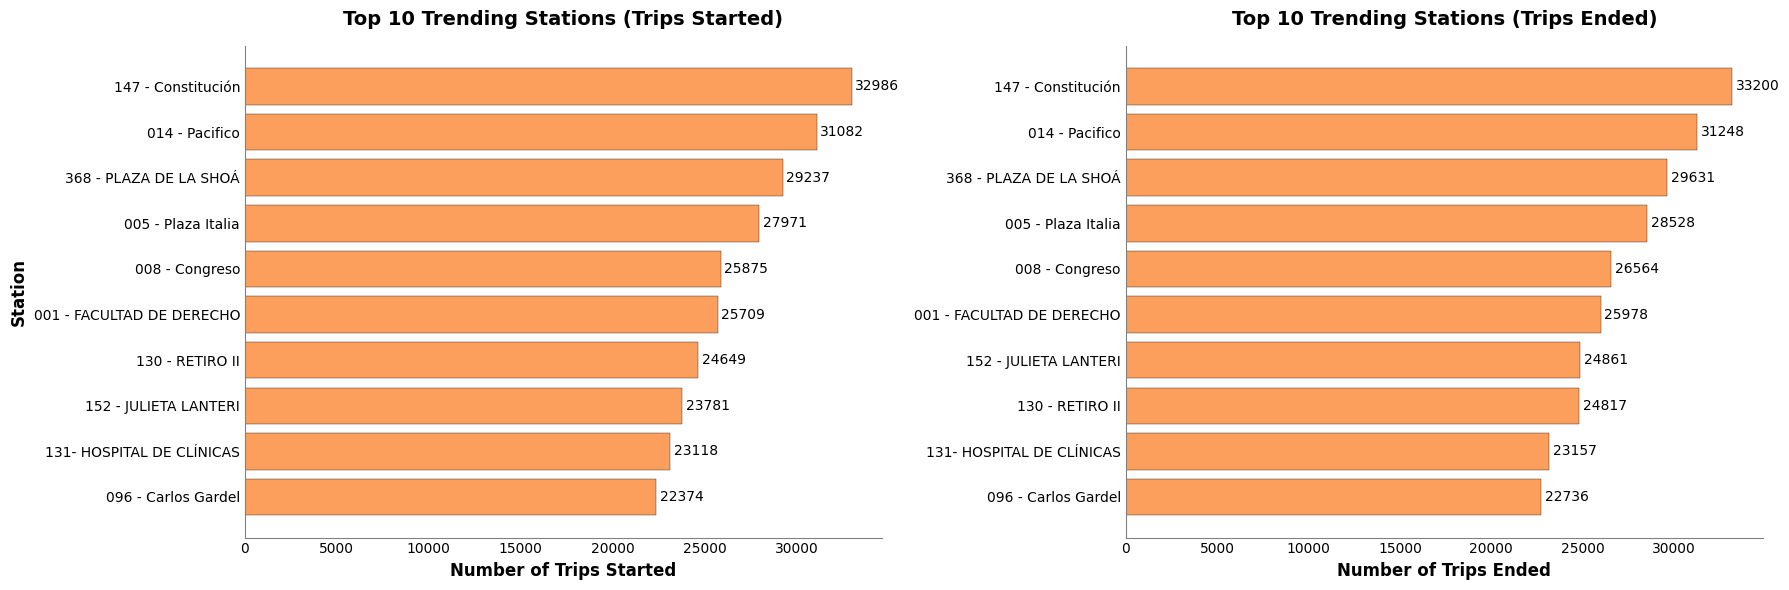

In [11]:
# Create a figure with two subplots side by side without sharing the y-axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=False)

# Graph 1: Top 10 Origin Stations (Ordered from Highest to Lowest)
top_origin_stations = df_trips["nombre_estacion_origen"].value_counts().reset_index()
top_origin_stations.columns = ["Station", "Trips Started"]
# Sorting in ascending order so that the highest value is last (appearing at the top)
top_10_origin = top_origin_stations.head(10).sort_values(by="Trips Started", ascending=True)

axes[0].barh(top_10_origin["Station"], top_10_origin["Trips Started"], color="#fc9f5c", edgecolor="black", linewidth=0.25)
axes[0].set_xlabel("Number of Trips Started", fontsize=12, fontweight="bold", color="black")
axes[0].set_ylabel("Station", fontsize=12, fontweight="bold", color="black")
axes[0].set_title("Top 10 Trending Stations (Trips Started)", fontsize=14, fontweight="bold", pad=15, color="black")
# No need to invert the y-axis

# Change axis line colors to gray
axes[0].spines["bottom"].set_color("gray")
axes[0].spines["left"].set_color("gray")

# Keep tick labels in black but set tick lines in gray
axes[0].tick_params(axis="x", colors="black", direction="out", length=0, width=1, grid_color="gray")
axes[0].tick_params(axis="y", colors="black", direction="out", length=0, width=1, grid_color="gray")

# Remove unnecessary chart borders
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)

# Display values on bars
for index, value in enumerate(top_10_origin["Trips Started"]):
    axes[0].text(value + 200, index, str(value), fontsize=10, verticalalignment="center", color="black")

# Graph 2: Top 10 Destination Stations (Ordered from Highest to Lowest)
top_destination_stations = df_trips["nombre_estacion_destino"].value_counts().reset_index()
top_destination_stations.columns = ["Station", "Trips Ended"]
# Sorting in ascending order so that the highest value is last (appearing at the top)
top_10_dest = top_destination_stations.head(10).sort_values(by="Trips Ended", ascending=True)

axes[1].barh(top_10_dest["Station"], top_10_dest["Trips Ended"], color="#fc9f5c", edgecolor="black", linewidth=0.25)
axes[1].set_xlabel("Number of Trips Ended", fontsize=12, fontweight="bold", color="black")
axes[1].set_title("Top 10 Trending Stations (Trips Ended)", fontsize=14, fontweight="bold", pad=15, color="black")
# No need to invert the y-axis

# Change axis line colors to gray
axes[1].spines["bottom"].set_color("gray")
axes[1].spines["left"].set_color("gray")

# Keep tick labels in black but set tick lines in gray
axes[1].tick_params(axis="x", colors="black", direction="out", length=0, width=1, grid_color="gray")
axes[1].tick_params(axis="y", colors="black", direction="out", length=0, width=1, grid_color="gray")

# Remove unnecessary chart borders
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)

# Display values on bars
for index, value in enumerate(top_10_dest["Trips Ended"]):
    axes[1].text(value + 200, index, str(value), fontsize=10, verticalalignment="center", color="black")

# Adjust layout
plt.tight_layout()
plt.show()

## 3. Popular Timeframes

### 3.1. Most Common Day for Rides

- **Objective:** Determine the day of the week when rides are most frequent.

### 3.2. Most Common Hours for Rides

- **Objective:** Identify the hours during which most rides occur.

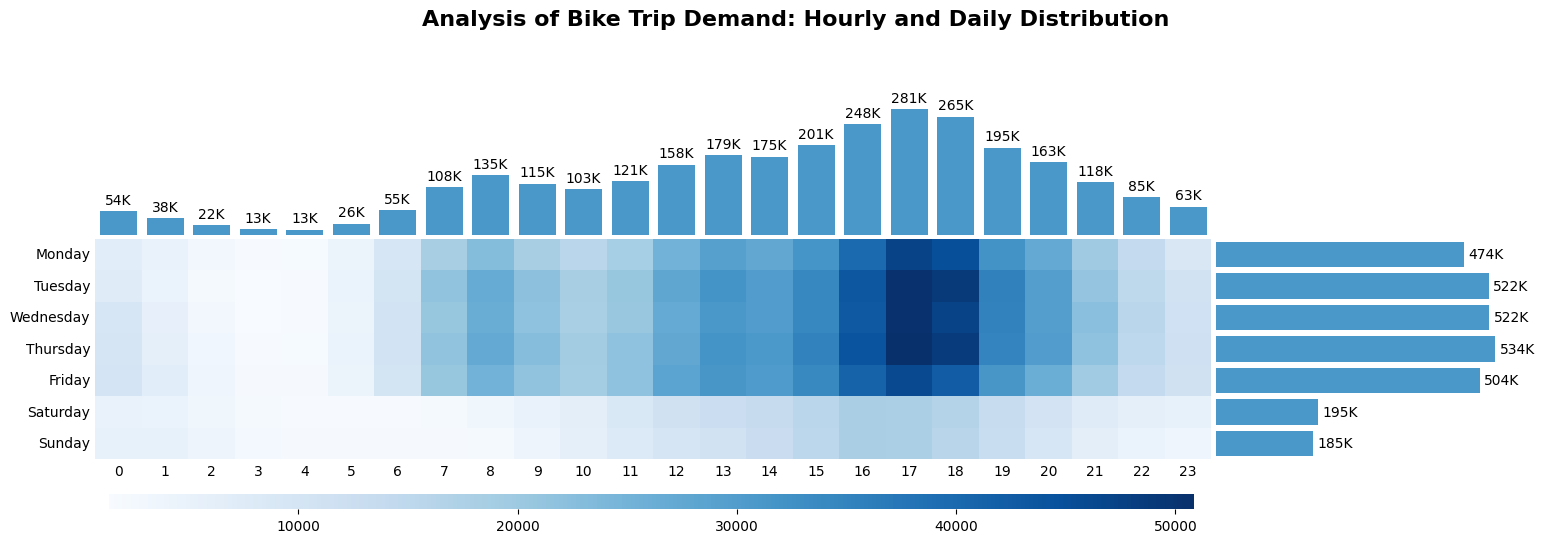

In [12]:
# ----------------------------
# Data Preparation
# ----------------------------
df_trips['fecha_origen_recorrido'] = pd.to_datetime(df_trips['fecha_origen_recorrido'], errors='coerce')
df_trips['day_of_week'] = df_trips['fecha_origen_recorrido'].dt.day_name()
df_trips['hour'] = df_trips['fecha_origen_recorrido'].dt.hour

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_trips['day_of_week'] = pd.Categorical(df_trips['day_of_week'], categories=days_order, ordered=True)

heatmap_data = df_trips.groupby(['day_of_week', 'hour'], observed=False).size().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex(days_order)

hourly_totals = heatmap_data.sum(axis=0)
day_totals = heatmap_data.sum(axis=1)

bar_color = plt.cm.Blues(0.6)

# ----------------------------
# Figure Configuration
# ----------------------------
dpi = 100
fig = plt.figure(figsize=(14, 5), dpi=dpi)

fig_width_pixels = fig.get_figwidth() * dpi
fig_height_pixels = fig.get_figheight() * dpi

wspace = 10 / fig_width_pixels
hspace = 10 / fig_height_pixels

gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1.75], width_ratios=[4, 1],
                       hspace=hspace, wspace=wspace)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_ylim(ax1.get_ylim())

ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1], sharey=ax3)

# ----------------------------
# Plot 1: Vertical Bar Chart
# ----------------------------
x = np.arange(0, 24)
x_positions = x + 0.5
bar_width = 0.8
bars = ax1.bar(x_positions, hourly_totals.values, width=bar_width, color=bar_color, align='center')

ax1.set_xlim(0, 24)
ax1.set_xticks(x + 0.5)
ax1.get_yaxis().set_visible(False)
ax1.margins(0)

for spine in ax1.spines.values():
    spine.set_visible(False)

for bar in bars:
    height = bar.get_height()
    label = f'{height/1000:.0f}K'
    ax1.annotate(label,
                 xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

ax1.set_xticklabels([])

# ----------------------------
# Plot 2: Empty Subplot
# ----------------------------
ax2.axis('on')
for spine in ax2.spines.values():
    spine.set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])

# ----------------------------
# Plot 3: Heatmap
# ----------------------------
cbar_ax = fig.add_axes([0.01, 0.05, 0.775, 0.03])

sns.heatmap(heatmap_data, cmap='Blues', cbar=True, cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"}, ax=ax3, linewidths=0)

ax3.set_xticks(x + 0.5)
ax3.set_xticklabels(x, rotation=0)
ax3.set_yticklabels(heatmap_data.index, rotation=0, va='center')

for spine in ax3.spines.values():
    spine.set_visible(False)
ax3.tick_params(axis='both', which='both', length=0)

# ----------------------------
# Plot 4: Horizontal Bar Chart
# ----------------------------
y_positions = ax3.get_yticks()
bars_h = ax4.barh(y=y_positions, width=day_totals.values, height=bar_width, color=bar_color, align='center')
ax4.margins(0)

for spine in ax4.spines.values():
    spine.set_visible(False)

ax4.tick_params(axis='y', labelleft=False)

for bar in bars_h:
    width = bar.get_width()
    label = f'{width/1000:.0f}K'
    ax4.annotate(label,
                 xy=(width, bar.get_y() + bar.get_height()/2),
                 xytext=(3, 0),
                 textcoords="offset points",
                 ha='left', va='center')

ax4.set_ylim(ax3.get_ylim())

# ----------------------------
# Remove Axis Labels
# ----------------------------
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel("")
    ax.set_ylabel("")

for ax in [ax1, ax2, ax4]:
    ax.tick_params(axis='both', which='both', colors=(0, 0, 0, 0), labelcolor=(0, 0, 0, 0))

# Add Title Above All Subplots
fig.suptitle("Analysis of Bike Trip Demand: Hourly and Daily Distribution", fontsize=16, fontweight='bold', y=1.05)

# Adjust Layout and Show Plot
plt.subplots_adjust(left=0, right=1, top=0.85, bottom=0.15)
plt.show()


## 4. Average Weekly Rides

- **Objective:** Calculate the average number of rides per week.


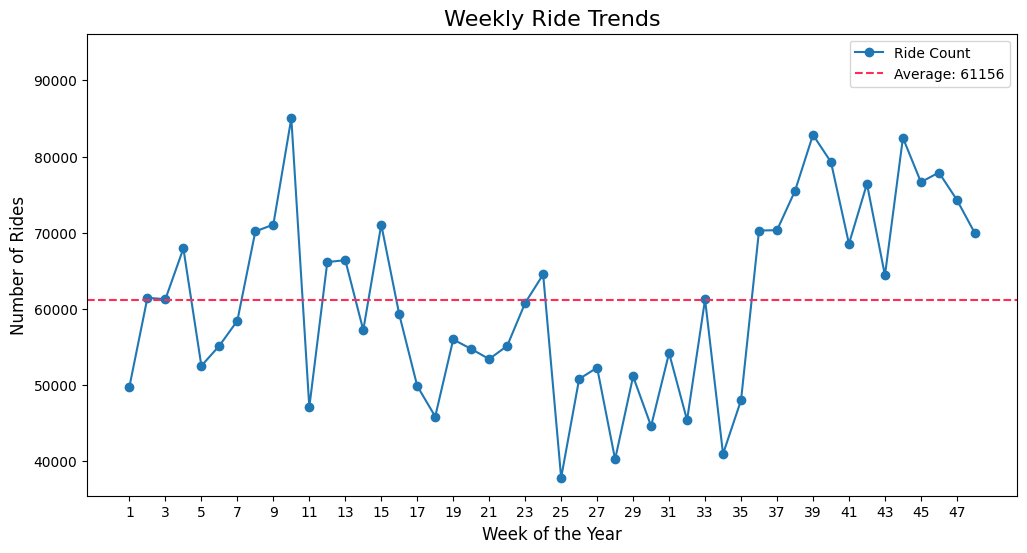

In [13]:
# Extract the week of the year and create a new column named 'week'
df_trips['week'] = df_trips['fecha_origen_recorrido'].dt.isocalendar().week

# Count the number of rides per week
rides_per_week = df_trips.groupby('week').size()

# Calculate the average number of rides per week
weekly_average = rides_per_week.mean()

# Create the plot
plt.figure(figsize=(12, 6))
# Plot the ride count curve
plt.plot(rides_per_week.index, rides_per_week.values, marker='o', linestyle='-', label='Ride Count')
# Plot the average line with the specified color, displaying the average without decimals
plt.axhline(weekly_average, color='#FF2D55', linestyle='--', label=f'Average: {weekly_average:.0f}')

# Configure x-axis ticks to be shown every 2 weeks
week_min, week_max = rides_per_week.index.min(), rides_per_week.index.max()
plt.xticks(np.arange(week_min, week_max + 1, 2))

# Add descriptive title and labels
plt.title('Weekly Ride Trends', fontsize=16)
plt.xlabel('Week of the Year', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)

# Extend y-axis to create space for the legend
current_ylim = plt.ylim()
plt.ylim(current_ylim[0], current_ylim[1] * 1.1)

# Position the legend inside the plot (upper right)
plt.legend(loc='upper right')

plt.show()

## 5. Bike Redistribution

### 5.1. Assessment of Bike Availability at Stations

- **Objective:** Evaluate whether there are enough bikes at all stations.

### 5.2. Redistribution Need

- **Objective:** Determine if the government should redistribute bikes.

### 5.3. Redistribution Justification

- **Objective:** Present data-driven arguments to justify any proposed redistribution.

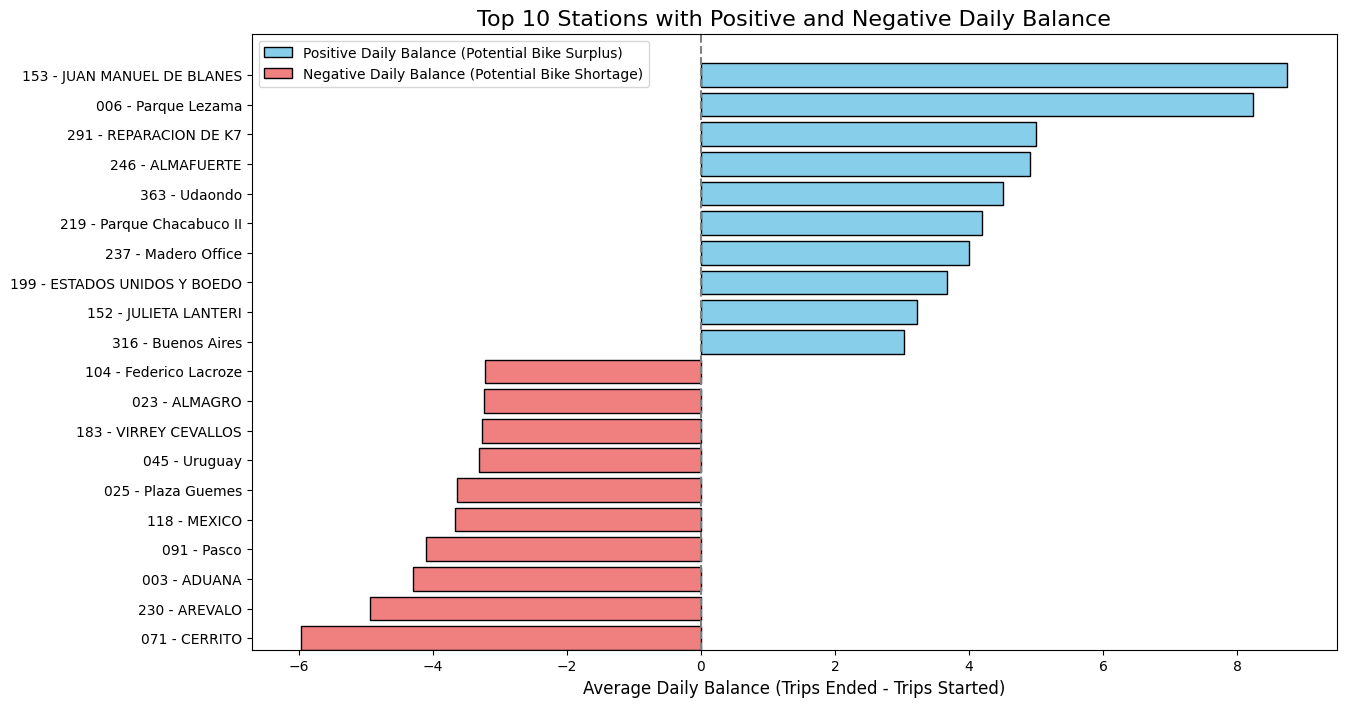

In [15]:
df_trips['date'] = df_trips['fecha_origen_recorrido'].dt.date
# --- Step 1: Calculate the daily number of trips started per station ---
daily_origin = df_trips.groupby(['date', 'nombre_estacion_origen']).size().reset_index(name='Trips_Started')
daily_origin = daily_origin.rename(columns={'nombre_estacion_origen': 'Station'})

# --- Step 2: Calculate the daily number of trips ended per station ---
daily_dest = df_trips.groupby(['date', 'nombre_estacion_destino']).size().reset_index(name='Trips_Ended')
daily_dest = daily_dest.rename(columns={'nombre_estacion_destino': 'Station'})

# --- Step 3: Combine the counts to get the daily balance for each station ---
daily_balance = pd.merge(daily_origin, daily_dest, on=['date', 'Station'], how='outer').fillna(0)
# Changed equation: now balance = Trips Ended - Trips Started
daily_balance['Daily_Balance'] = daily_balance['Trips_Ended'] - daily_balance['Trips_Started']

# --- Step 4: Calculate the average daily balance for each station ---
avg_daily_balance = daily_balance.groupby('Station')['Daily_Balance'].mean().reset_index(name='Avg_Daily_Balance')

# --- Step 5: Extract top 10 stations with positive and negative average daily balance ---
top_positive = avg_daily_balance[avg_daily_balance['Avg_Daily_Balance'] > 0].sort_values('Avg_Daily_Balance', ascending=False).head(10)
top_negative = avg_daily_balance[avg_daily_balance['Avg_Daily_Balance'] < 0].sort_values('Avg_Daily_Balance', ascending=True).head(10)

# Combine the two groups into one DataFrame
combined = pd.concat([top_positive, top_negative])

# Create a new column for color coding:
# Using skyblue for positive balance (potential bike surplus) and lightcoral for negative balance (potential bike shortage)
combined['Color'] = combined['Avg_Daily_Balance'].apply(lambda x: 'skyblue' if x > 0 else 'lightcoral')

# Sort combined data by average daily balance (descending) for plotting
combined = combined.sort_values('Avg_Daily_Balance', ascending=False)

# --- Step 6: Visualize the results in a single plot ---
plt.figure(figsize=(14, 8))
bars = plt.barh(combined['Station'], combined['Avg_Daily_Balance'], color=combined['Color'], edgecolor='black')
plt.xlabel('Average Daily Balance (Trips Ended - Trips Started)', fontsize=12)
plt.title('Top 10 Stations with Positive and Negative Daily Balance', fontsize=16)
plt.axvline(0, color='gray', linestyle='--')

# Invert y-axis to have the highest balance on top
ax = plt.gca()
ax.invert_yaxis()

# Extend the y-axis a bit to add margin so that the legend does not overlap the bars
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin - 1, ymax)

# Add a legend manually with the updated labels
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='black', label='Positive Daily Balance (Potential Bike Surplus)'),
    Patch(facecolor='lightcoral', edgecolor='black', label='Negative Daily Balance (Potential Bike Shortage)')
]
plt.legend(handles=legend_elements, loc='upper left')

plt.show()

## 6. Ride Duration

- **Objective:** Calculate the average ride duration.

## 7. Mechanical Service Investment

- **Objective:** Identify where to place mechanical bike services.

## 8. Additional Analysis

- **Objective:** Explore any additional insights that may be valuable.

## 9. Data Model Improvement

- **Objective:** Propose improvements to the current data model focused on user retention tracking.

## 10. Feature Suggestion

- **Objective:** Suggest a new feature to improve the user experience.